### DIP Lab ~ 1
##### Name: Parth Sood
##### Roll No.: 21BCP252
##### Date: 12th January 2024

#### Write a program to perform point processing based image enhancements on the images given in the folder Assignment 1.  

In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

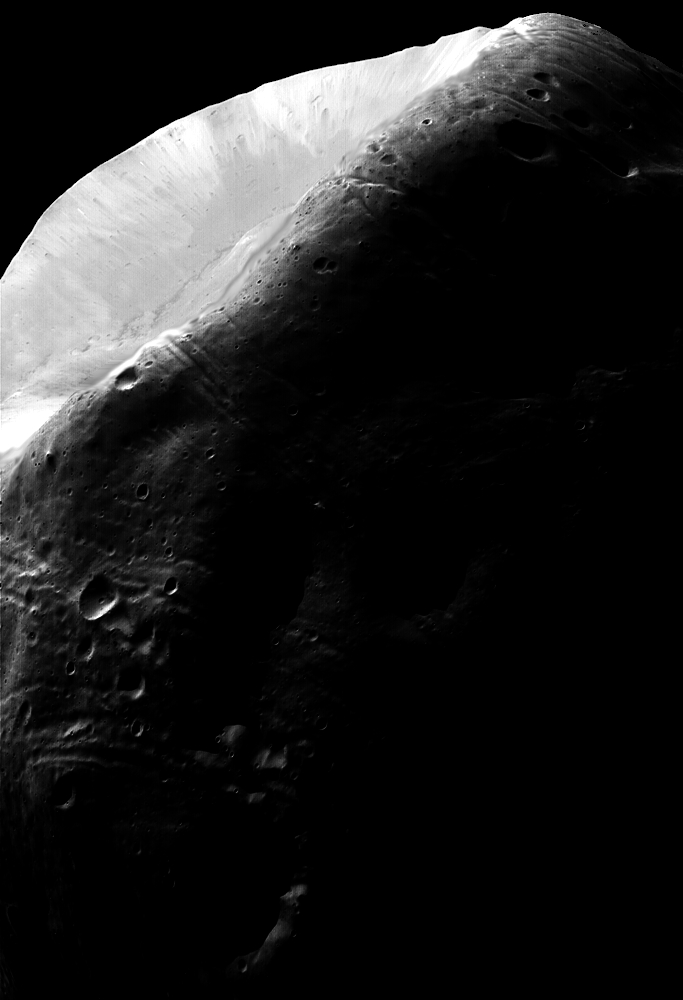

In [6]:
img = "D:\DIP_Lab\Lab_1\Assignment1\Assignment1\img5.tif"
im = Image.open(img)
im

In [8]:
im.mode
# 'L' means that the image is a 8-bit grayscale image
# Image is already a grayscale image. So we don't need to convert it to grayscale
im = np.array(im)
im.shape

(1000, 683)

In [9]:
enhanced_im = np.zeros(im.shape, dtype=np.uint8)
enhanced_im

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
# creating a negative here
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        enhanced_im[i,j] = 255 - im[i,j]

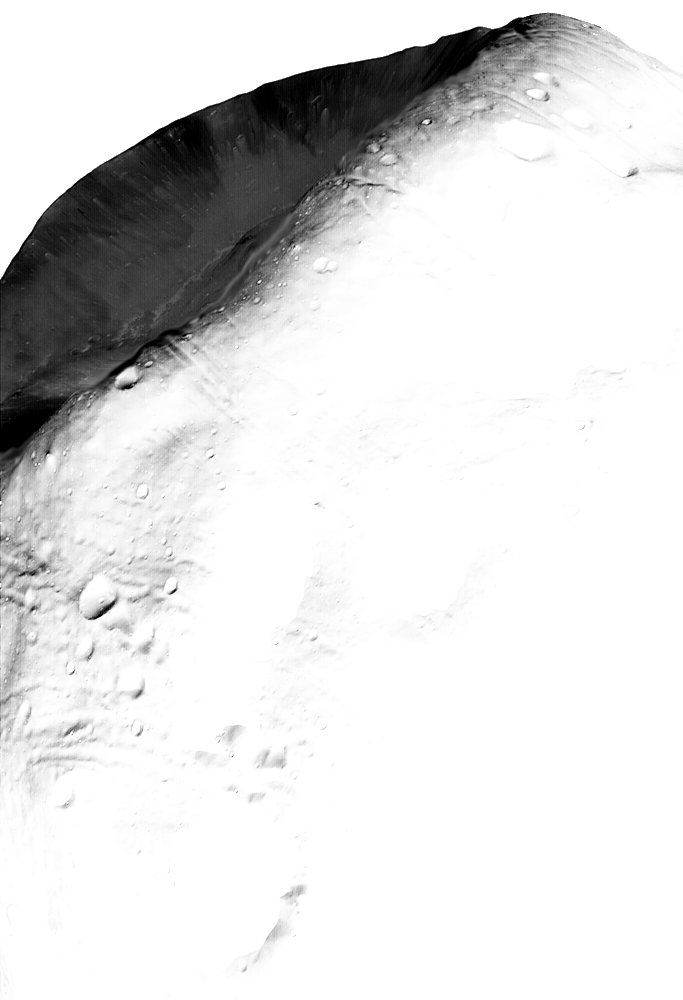

In [11]:
enhanced_im = Image.fromarray(enhanced_im)
enhanced_im

We have to do this for all the image

In [12]:
# we need to make the image negative
def invert_image(images:list) -> list:

    #formula for negative of an image is 255 - pixel_value
    inverted_images = []
    for img in images:
        img = Image.open(img)
        img = np.array(img)
        enhanced_im = np.zeros(img.shape, dtype=np.uint8)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                enhanced_im[i,j] = 255 - img[i,j]
        enhanced_im = Image.fromarray(enhanced_im)
        inverted_images.append(enhanced_im)
    return inverted_images

In [13]:
im_path = os.listdir('D:\DIP_Lab\Lab_1\Assignment1\Assignment1')
im_path = [os.path.join('D:\DIP_Lab\Lab_1\Assignment1\Assignment1', i) for i in im_path]
inv_img = invert_image(im_path)

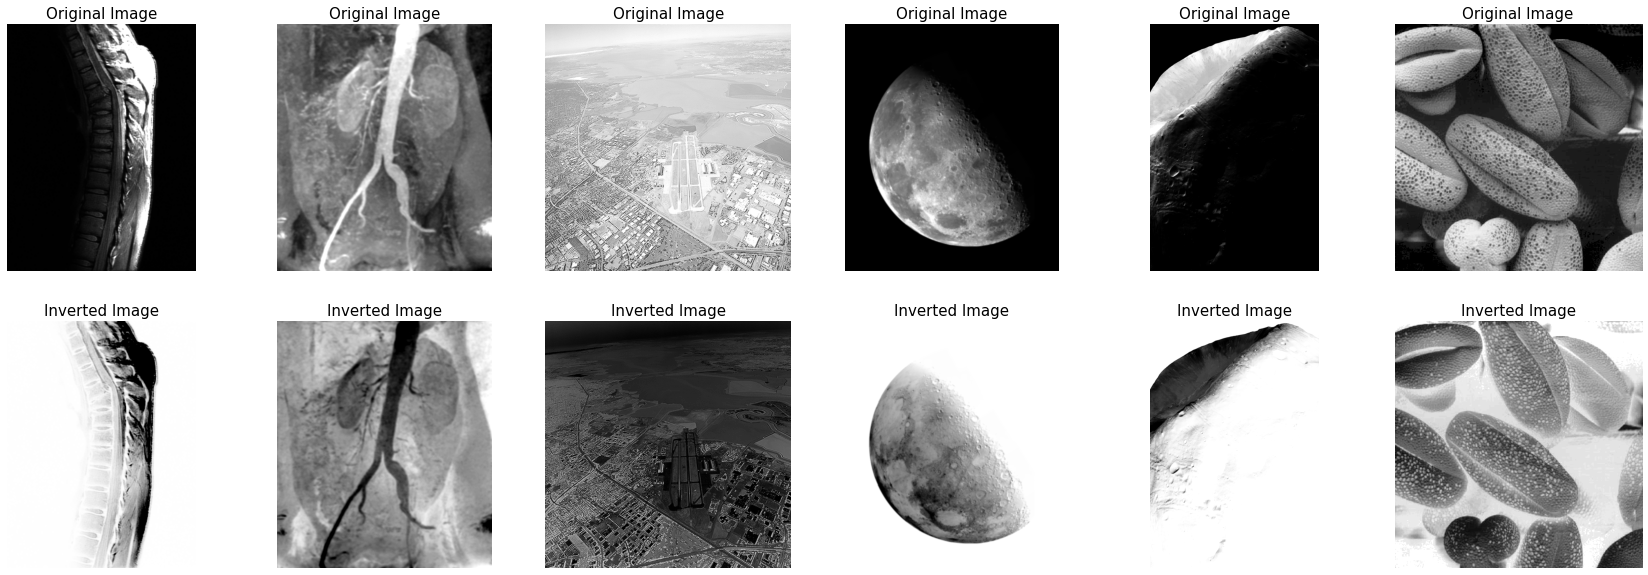

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

fig, ax = plt.subplots(2, 6, figsize=(30, 10)) 

for i in range(6):
    ax[0, i].imshow(Image.open(im_path[i]), cmap="gray")
    ax[0, i].set_title("Original Image", fontsize=15)
    ax[0, i].axis("off")
    ax[1, i].imshow(inv_img[i], cmap="gray")
    ax[1, i].set_title("Inverted Image", fontsize=15)
    ax[1, i].axis("off")
    
plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

#### B. Log and Inverse Log Transformation

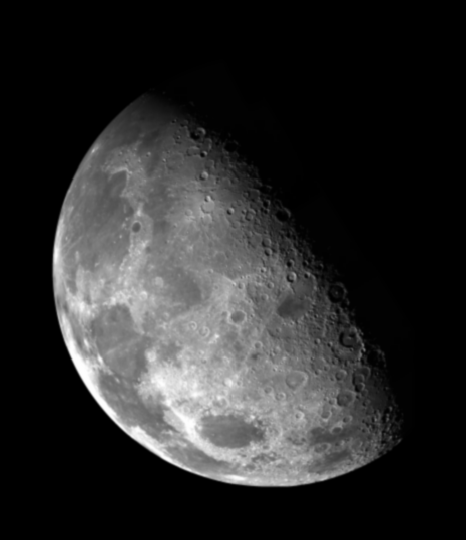

In [18]:
img = "D:\DIP_Lab\Lab_1\Assignment1\Assignment1\img4.tif"
im = Image.open(img)
im

In [29]:
eps = 1e-5
const = 2
im = np.array(im)
normalized_img = im/255.0
normalized_img += eps
enh_img = const*np.log(1+normalized_img)
enh_img = (enh_img*255).astype(np.uint8)
# enh_img 


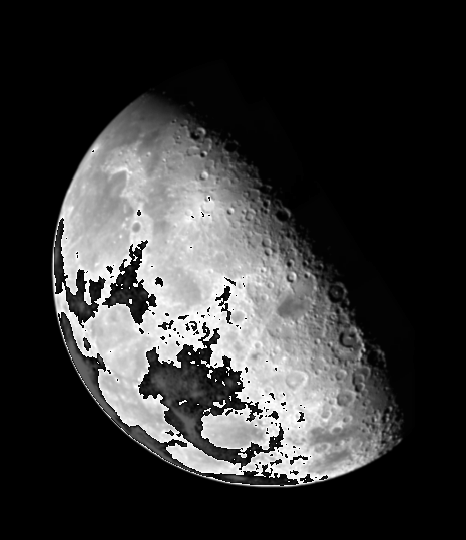

In [30]:
enh_img = Image.fromarray(enh_img)
enh_img

In [34]:
def log_trans(images:list,c=2) -> list:
    # log transformation = c*log(1+original_pixel)

    eps = 1e-5
    enhanced_images = []
    for i in images:
        i = Image.open(i)
        i = np.array(i)
        normalized_img = i/255.0
        normalized_img += eps
        enhanced = c*np.log(1+normalized_img)
        enhanced = (enhanced*255).astype(np.uint8)
        enhanced_images.append(enhanced)
    return enhanced_images

In [39]:
log_transform = log_trans(im_path,c=2)

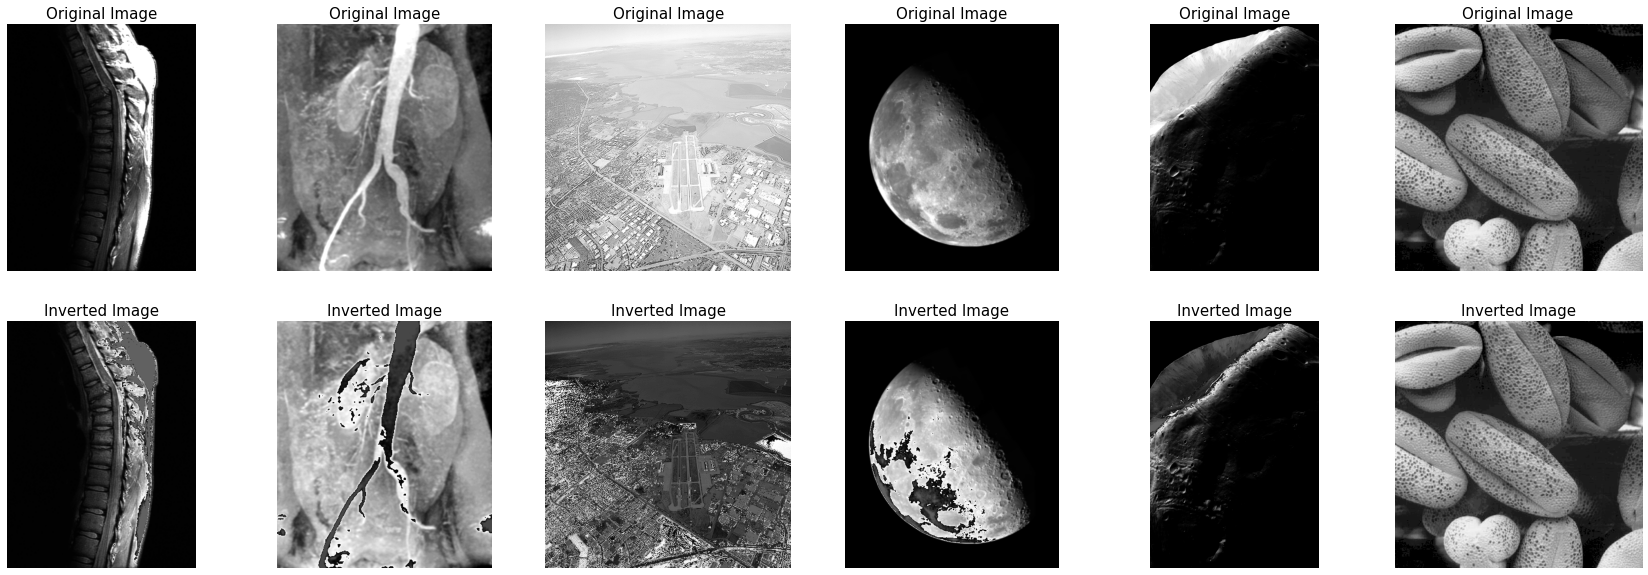

In [40]:
import matplotlib.pyplot as plt
from PIL import Image

fig, ax = plt.subplots(2, 6, figsize=(30, 10)) 

for i in range(6):
    ax[0, i].imshow(Image.open(im_path[i]), cmap="gray")
    ax[0, i].set_title("Original Image", fontsize=15)
    ax[0, i].axis("off")
    ax[1, i].imshow(log_transform[i], cmap="gray")
    ax[1, i].set_title("Inverted Image", fontsize=15)
    ax[1, i].axis("off")
    
plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

In [41]:
def plot_images(images:list, rows:int, cols:int, plot_title:str, titles:list=["Original Image", "Transformed Image"], figsize:tuple=(30, 10)):
     
    if rows != len(titles):
        raise ValueError("Number of rows and length of titles should be equal")

    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    for i in range(rows):
        for j in range(cols):
            ax[i, j].imshow(images[i*cols + j], cmap="gray")
            ax[i, j].set_title(titles[i], fontsize=15)
            ax[i, j].axis("off")
    
    if plot_title:
        plt.suptitle(plot_title, fontsize=20)
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    plt.show()

In [42]:
og_img = [Image.open(i) for i in im_path]
og_img=[np.array(i) for i in og_img]
all_images = og_img + inv_img + log_transform
len(all_images)

18

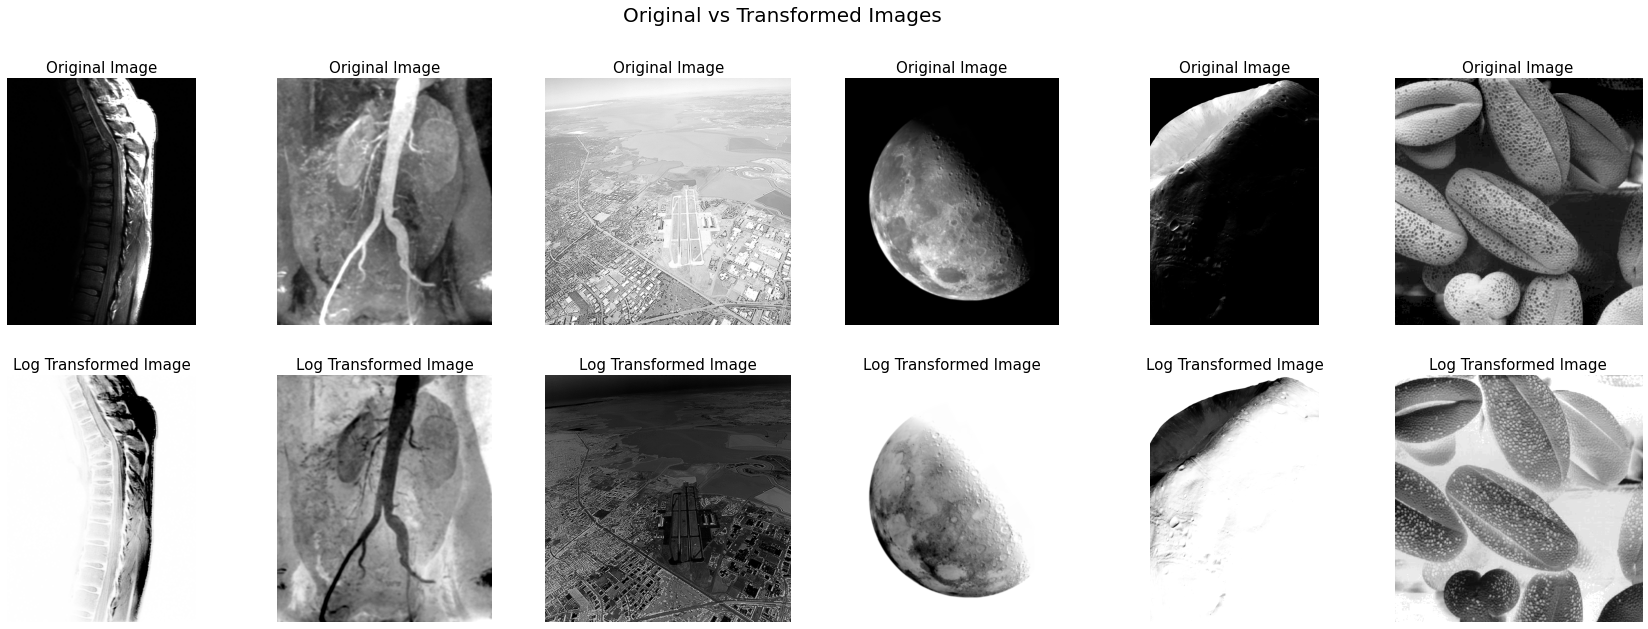

In [48]:
plot_images(all_images, 2, 6, titles=["Original Image", "Log Transformed Image"], plot_title="Original vs Transformed Images")


### C. Gamma Correction (power law) with different +ve and –ve values of gamma, gamma greater than 1 and less than 1

In [49]:
img = "D:\DIP_Lab\Lab_1\Assignment1\Assignment1\img3.tif"
im = Image.open(img)
im = np.array(im)
enhanced_im = np.zeros(im.shape, dtype=np.uint8)

In [50]:
const = 1.5
gmma = 3
norm_im = im/255.0

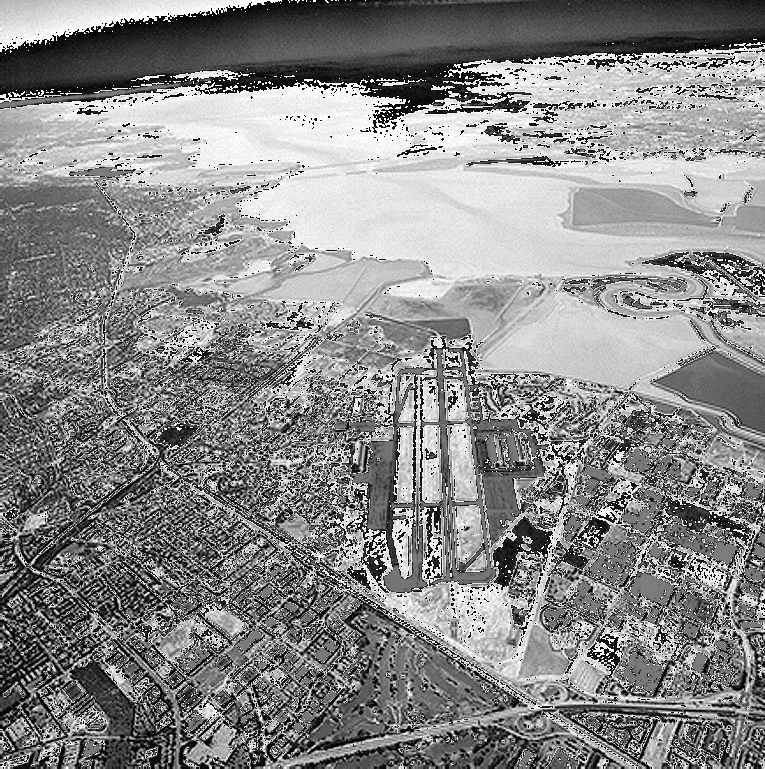

In [51]:
enh_im = np.power(norm_im, gmma)*const
enh_im = (enh_im*255).astype(np.uint8)
enh_im = Image.fromarray(enh_im)
enh_im

In [54]:
def pow_trans(images:list,c=2,gamma=1) -> list:
    #formula-
    # s = c*(r^gamma)
    eps = 1e-10
    enhanced_image = []
    for i in images:
        i = Image.open(i)
        i = np.array(i)
        norm_im = i/255.0
        norm_im += eps
        enhanced = np.power(norm_im,gamma)*c
        enhanced = np.clip(enhanced,0,1)
        enhanced = (enhanced*255).astype(np.uint8)
        enhanced_image.append(enhanced)
    return enhanced_image 



In [60]:
power_trans_img = pow_trans(im_path,c=3,gamma=2) 

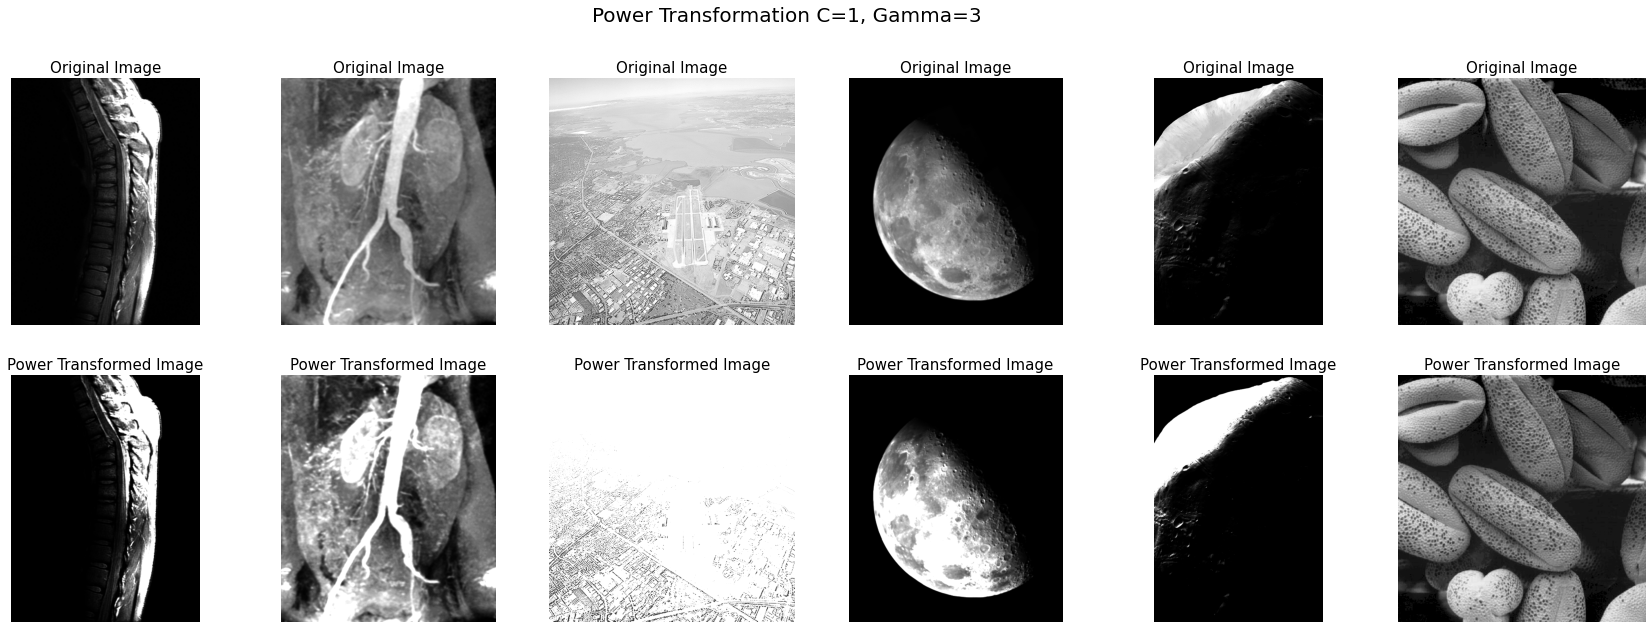

In [61]:
plot_images(og_img +power_trans_img, 2, 6, plot_title="Power Transformation C=1, Gamma=3", titles=["Original Image", "Power Transformed Image"])